RMSE for lambda = 0.1 is 0.03257767029357361


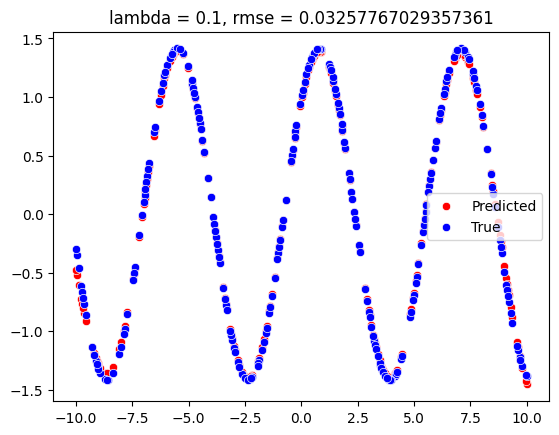

RMSE for lambda = 1 is 0.17030390344202517


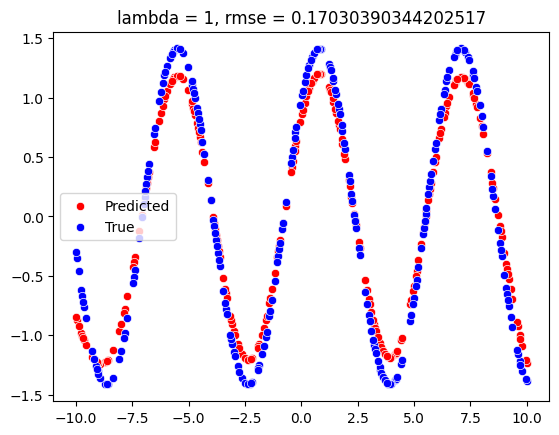

RMSE for lambda = 10 is 0.6092671596540066


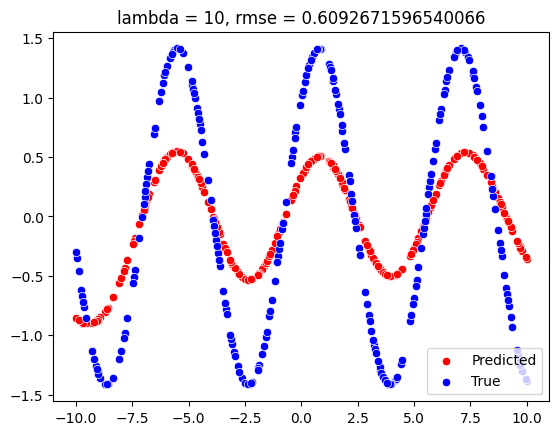

RMSE for lambda = 100 is 0.9110858052767243


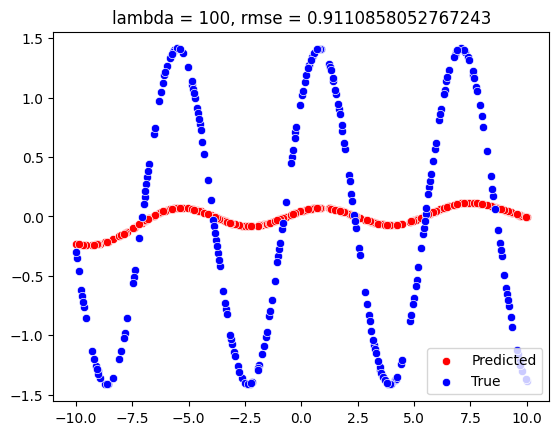

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge

def rbf_kernel(x, y, gamma=0.1):
    return np.exp(-gamma * np.square(x.reshape((-1, 1)) - y.reshape((1, -1))))

def load_data(location):
    train_data = np.loadtxt(location+'/ridgetrain.txt')
    test_data = np.loadtxt(location+'/ridgetest.txt')
    x_train, y_train = train_data[:, 0], train_data[:, 1]
    x_test, y_test = test_data[:, 0], test_data[:, 1]
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_data('./data')
iterations = [0.1, 1, 10, 100]
kernel_matrix = rbf_kernel(x_train, x_train)
identity_matrix = np.eye(x_train.shape[0])

for regularization_param in iterations:
    clf = KernelRidge(alpha=regularization_param, kernel='rbf', gamma=0.1)
    clf.fit(x_train[:, np.newaxis], y_train)
    y_predicted = clf.predict(x_test[:, np.newaxis])
    rmse = np.sqrt(np.mean(np.square(y_test - y_predicted)))
    print('RMSE for lambda =', regularization_param, 'is', rmse)
    plt.figure()
    plt.title('lambda = ' + str(regularization_param) + ', rmse = ' + str(rmse))
    sns.scatterplot(x=x_test.flatten(), y=y_predicted.flatten(), color='red', label='Predicted')
    sns.scatterplot(x=x_test.flatten(), y=y_test.flatten(), color='blue', label='True')
    plt.legend()
    # plt.savefig(f'part1_kernel_{regularization_param}.png')
    plt.show()
